In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import torch as ch
from pathlib import Path

from cox.store import Store

import matplotlib.pyplot as plt
import torch as ch
import sys
sys.path.insert(0, '../src/new_src')

In [2]:
### SET THIS USING THE PRINTED OUTPUT OF `run_betabinom.py`
INPUT_DATA = None

assert INPUT_DATA, 'You need to replace INPUT_DATA with the output of `run_betabinom.py`'

inp_path = Path(INPUT_DATA)
exp_id = inp_path.stem
exp_dir = inp_path.parent

s = Store(exp_dir, exp_id)

In [3]:
def v1_vs_v2_data(p):
    if type(p) == str:
        dists = ch.load(p)[0]
    else:
        dists = p
        
    x_pts, y_pts, y2_pts, names = [], [], [], []
    for d in dists:
        prob_correct_v1 = d.v1_acc
        prob_correct_v2 = d.v2_acc
        corrected_acc = d.corrected_accuracy

        x_pts.append(prob_correct_v1)
        y_pts.append(prob_correct_v2)
        y2_pts.append(corrected_acc)
        names.append(d.name)
        
    return map(np.array, [x_pts, y_pts, y2_pts, names])

def plot_v1_vs_v2_data(data, filt, top=None):    
    data = [tup for tup in zip(*data) if filt(tup[-1])]
    if top:
        data = sorted(data, key=lambda t:t[0])[top:]
        
    data = zip(*data)
        
    x_pts, y_pts, y2_pts, names = data
    
    df = pd.DataFrame({
        'v1':x_pts,
        'v2':y_pts,
        'v2_adj':y2_pts,
        'name':names
    })
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.scatter(x_pts, y_pts, label='raw', marker='x', s=10)
    ax.scatter(x_pts, y2_pts, label='adjusted', marker='x', s=10)
    
    delt = (np.array(y2_pts) - np.array(y_pts))
    
    best_fit(x_pts, y_pts, 'raw')
    best_fit(x_pts, y2_pts, 'adjusted')

    ax.plot([0, 1], [0, 1])
    ax.legend()
    fig.show()
    
    return df

from scipy.stats import linregress
def best_fit(x, y, pref):
    slope, intercept, _, _, _ = linregress(x,y)
    print(f'{pref}: y = {slope}x + {intercept}')

raw: y = 1.149127291867626x + -0.23199882320582677
adjusted: y = 0.9631716618077327x + -0.002260960901847797


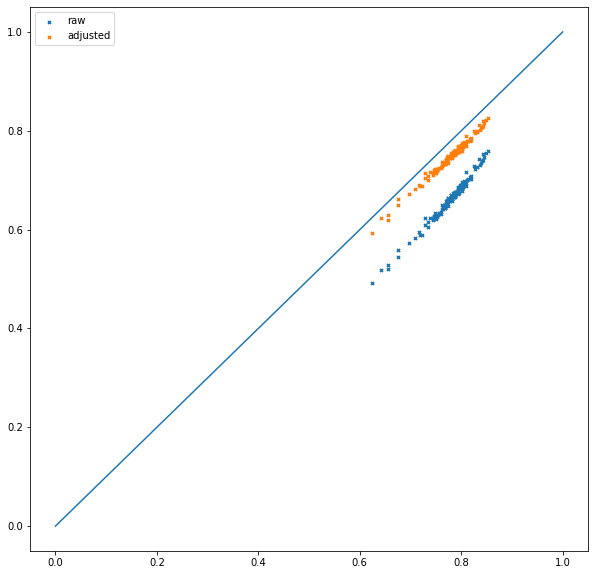

In [4]:
fitted = s['out'].get_object(s['out'].df['dists'][0])

data = v1_vs_v2_data(fitted)
filt = lambda x: not (("sws_" in x) or ("ssl" in x) or ("ig" in x))

results = plot_v1_vs_v2_data(data, filt)

In [5]:
results

,v1,v2,v2_adj,name
0,0.7970,0.6840,0.765032,correct_gluon_resnet152_v1b
1,0.7598,0.6356,0.726095,correct_mixnet_s
2,0.7860,0.6722,0.756437,correct_efficientnet_b1
3,0.8089,0.6946,0.773703,correct_gluon_resnext101_64x4d
4,0.7862,0.6660,0.752274,correct_tf_efficientnet_b1
...,...,...,...,...
137,0.8021,0.6845,0.767108,correct_dpn107
138,0.7496,0.6212,0.715078,correct_fbnetc_100
139,0.8404,0.7387,0.806667,correct_swsl_resnext101_32x16d
140,0.6419,0.5188,0.623314,correct_dla46_c
